**Linear Regression**

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([5.1, 7.2, 8.9, 11.1, 12.8]).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(X)
print(y_pred)

[[1.93]]
[3.23]
[[ 5.16]
 [ 7.09]
 [ 9.02]
 [10.95]
 [12.88]]


**Logistic Regression**

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
X = np.array([1, 2, 3, 4, 5, 7]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,)
clf = LogisticRegression().fit(X, y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)
print(y_pred)
print(y_pred_proba[:,1])

[0 0 0 1 1 1]
[0.05915596 0.15714628 0.35603106 0.62113094 0.82939351 0.97714137]


**Decision Tree**

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
        'likes height': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes'], 
        'go rock climbing': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes']}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,go rock climbing
0,23,no,no,no
1,31,yes,yes,yes
2,35,no,yes,yes
3,35,no,no,no
4,42,no,no,no
5,43,yes,yes,yes
6,45,yes,no,no
7,46,yes,yes,yes
8,46,no,yes,no
9,51,yes,yes,yes


In [137]:
# transfor data
df.loc[df['likes goats']=='no', 'likes goats'] = 0
df.loc[df['likes goats']=='yes', 'likes goats'] = 1
df.loc[df['likes height']=='no', 'likes height'] = 0
df.loc[df['likes height']=='yes', 'likes height'] = 1
df.loc[df['go rock climbing']=='no', 'go rock climbing'] = 0
df.loc[df['go rock climbing']=='yes', 'go rock climbing'] = 1
df[['likes goats', 'likes height', 'go rock climbing']] = df[['likes goats', 'likes height', 'go rock climbing']].astype(int)
df

,age,likes goats,likes height,go rock climbing
0,23,0,0,0
1,31,1,1,1
2,35,0,1,1
3,35,0,0,0
4,42,0,0,0
5,43,1,1,1
6,45,1,0,0
7,46,1,1,1
8,46,0,1,0
9,51,1,1,1


In [138]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)

In [139]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
print(f'Predictions: {clf.predict(X)}')
print(f'Predicted Probabilites{clf.predict_proba(X)}')

Predictions: [0 1 1 0 0 1 0 1 0 1]
Predicted Probabilites[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


[Text(0.4, 0.875, 'likes height <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'likes goats <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.375, 'age <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

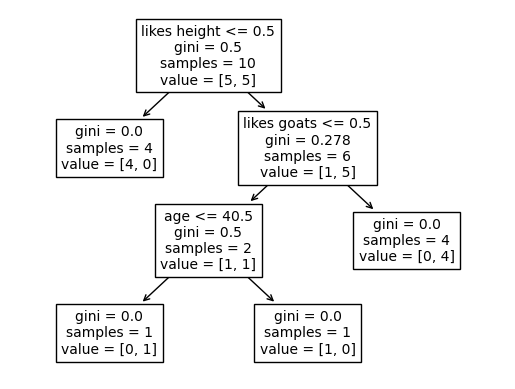

In [140]:
plot_tree(clf, feature_names=['age', 'likes goats', 'likes height'], fontsize=10)

In [2]:
from sklearn.tree import DecisionTreeRegressor